# Conway's Game of Life

#### Implemented in Octave, due to easy Matrix operations in Octave.



I've tried to keep it general, by enabling the user to choose their own matrix size and rules for cells surviving and dying.

Change the values of size_x and size_y to change the size of the grid.

In [1]:
size_x = 100;
size_y = 100;

We'll now set the rules for the cells to survive and be born. Set `num_born` to zero if you want it to only survive or die without new cells being born.

In [2]:
%rules for cell survival:
num_survive_min = 2;
num_survive_max = 3;
%rules for new cells being born:
num_born = 3;

The starting grid is constructed randomly, with any cell that has a value greater than 0.9 being made 1 and the rest are set to 0. 

(Change the value from 0.1 to smaller if you want more black spots in the original matrix.)

Also, this version of the Conway's game will ignore the edges as the edges could be implemented in a plethora of different ways, such as them being connected across the edges, while others could want the edges not to be connected, while yet others will consider that the grid is an infinite plane, of which we can only see a part. 

Thus, by considering that the edges are non-existent, we are leaving it to interpretation, and to advanced implementations to possibly cover this in the future.

In [3]:
playground = rand(size_y,size_x)>.9;

playground(:,1)=0;
playground(:,size_x)=0;
playground(1,:)=0;
playground(size_y,:)=0;

%if you want to start with a specific matrix, go ahead and input it here:
#playground = [0,0,0,0,0,0;0,0,0,1,0,0;0,1,0,0,1,0;0,1,0,0,1,0;0,0,1,0,0,0;0,0,0,0,0,0]

Now, colouring this using imshow...

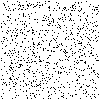

In [4]:
imshow(!playground);

...but, that's wayyy too small to see clearly... 

Let's make it N-times bigger, and add horizontal and vertical lines to make a clear grid for this

In [5]:
function [scaled] = scaleNx(unscaled,N)
    [height,width] = size(unscaled);
    scaled = zeros(N*height,N*width);  %create a N-times larger displayable matrix
    scaled(1:N:end,:) = 1;%color the horizontal lines black (actually 1 corresponds to white, but we invert it, so that 1 represents black)
    scaled(:,1:N:end) = 1;%color the  vertical  lines black
    scaled(end,:) = 1;%color the last horizontal line black
    scaled(:,end) = 1;%color the last vertical line black

    for i = 1:rows(scaled)-1
        for j = 1:columns(scaled)-1
            idata = floor((i-1)/N)+1; %color all the sub-pixels black vertically
            jdata = floor((j-1)/N)+1; %color all the sub-pixels black horizontally
            if(unscaled(idata, jdata) == 1)
                scaled(i,j) = 1;
            end
        end
    end

end

Look at how this already makes things so much easier to see...

(Point to note here is that the rendering of this grid takes longer than the finding of the next generation... That shows just how expensive i/o operations are in any program!)

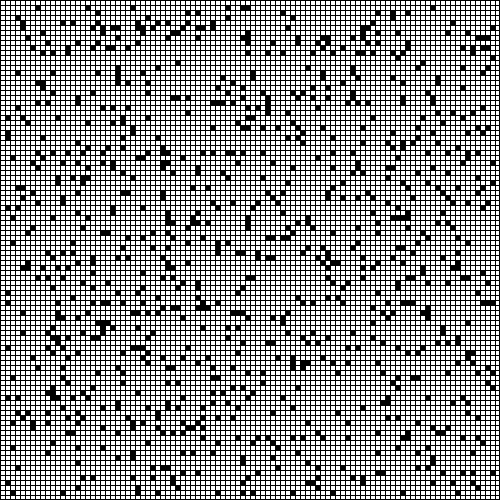

In [6]:
imshow(!scaleNx(playground,5))

Algorithm to find the next generation:

In [7]:
function [nextgen] = evalNextGen(currgen,survive_min,survive_max,born)
    [height,width] = size(currgen);
    nextgen = zeros(height,width);
    for i = 2:width-1
        for j = 2:height-1
            aliveNeighbours = 0;
            % counting live neighbours + current cell
            for l = -1:1
                for m = -1:1
                    aliveNeighbours += currgen(i+l,j+m);
                end
            end
            aliveNeighbours -= currgen(i,j); %just in case the current cell was 1, we need to subtract it
            
            % The actual rules:
            % 1. Not enough cells around it -> cell dies:
            if (currgen(i,j)==1 && aliveNeighbours<survive_min)
                nextgen(i,j)=0;
            % 2. Too many cells around it -> cell dies:
            elseif (currgen(i,j)==1 && aliveNeighbours>survive_max)
                nextgen(i,j)=0;
            % 3. Just enough cells around a dead cell -> new cell is born:
            elseif (currgen(i,j)==0 && aliveNeighbours==born)
                nextgen(i,j)=1;
            % 4. Just enough cells around a live cell -> cell merely survives:
            elseif (currgen(i,j)==1 && aliveNeighbours>=survive_min && aliveNeighbours<=survive_max)
                nextgen(i,j)=1;
            endif
        end
    end
end

Now saving the original `playground` value in a matrix, so that we could use it later if needed.

In [8]:
original = playground;

Now, printing to files...

(Note that the image shown at the bottom of the next cell will be the last image generated by the algorithm, as it shows the figure which was last plotted).

See the video made from the output of these 50 pictures as a .avi file in the `Conway's Game of Life.avi` file in this directory.

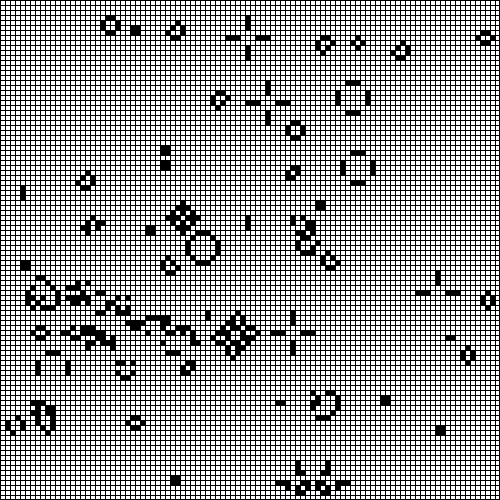

In [9]:
imshow(!scaleNx(original,5));
print -dpng file_0.png
for i = 1:50
    new_playground = evalNextGen(playground,num_survive_min,num_survive_max,num_born);
    imshow(!scaleNx(new_playground,5));
    file_string = sprintf("print -dpng file_%d.png",i);
    eval(file_string)
    playground = new_playground;
end;